In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
RAW_DATA_DIR = "../data/raw/"
PROCESSED_DATA_DIR = "../data/processed/"

train_df = pd.read_csv(os.path.join(RAW_DATA_DIR, "train.csv"))
test_df = pd.read_csv(os.path.join(RAW_DATA_DIR, "test.csv"))

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

Train shape: (891, 12)
Test shape: (418, 11)


In [3]:
print(train_df.head(20).to_markdown())


|    |   PassengerId |   Survived |   Pclass | Name                                                    | Sex    |   Age |   SibSp |   Parch | Ticket           |    Fare | Cabin   | Embarked   |
|---:|--------------:|-----------:|---------:|:--------------------------------------------------------|:-------|------:|--------:|--------:|:-----------------|--------:|:--------|:-----------|
|  0 |             1 |          0 |        3 | Braund, Mr. Owen Harris                                 | male   |    22 |       1 |       0 | A/5 21171        |  7.25   | nan     | S          |
|  1 |             2 |          1 |        1 | Cumings, Mrs. John Bradley (Florence Briggs Thayer)     | female |    38 |       1 |       0 | PC 17599         | 71.2833 | C85     | C          |
|  2 |             3 |          1 |        3 | Heikkinen, Miss. Laina                                  | female |    26 |       0 |       0 | STON/O2. 3101282 |  7.925  | nan     | S          |
|  3 |             4 |        

In [4]:
test_df.info()
print(f"\nData describe:\n{train_df.describe(include='all').to_markdown()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB

Data describe:
|        |   PassengerId |   Survived |     Pclass | Name                    | Sex   |      Age |      SibSp |      Parch |   Ticket |     Fare | Cabin   | Embarked   |
|:-------|--------------:|-----------:|-----------:|:------------------------|:------|---------:|----

In [5]:
print(f"Missing values in train: \n{train_df.isnull().sum()}")

Missing values in train: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


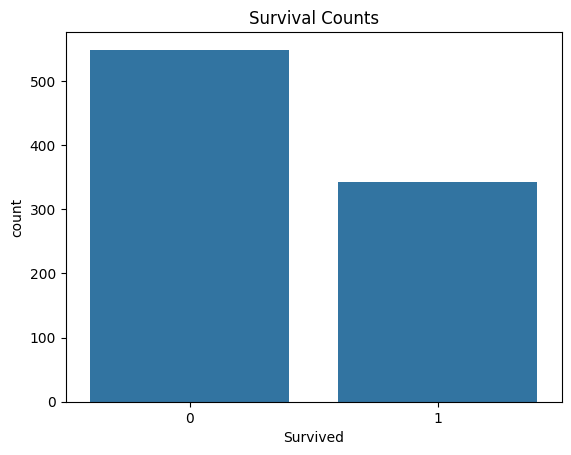

In [6]:
sns.countplot(x='Survived', data=train_df)
plt.title("Survival Counts")
plt.show()

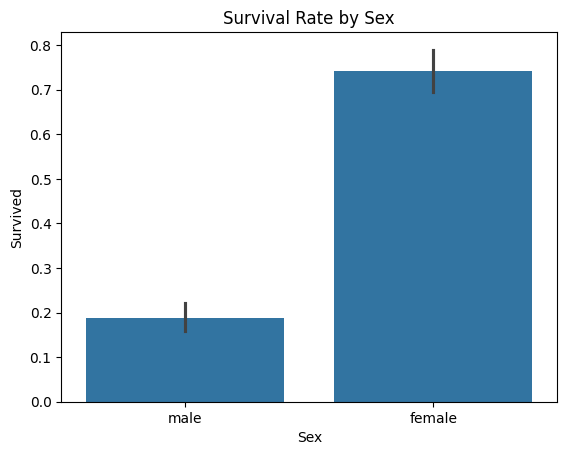

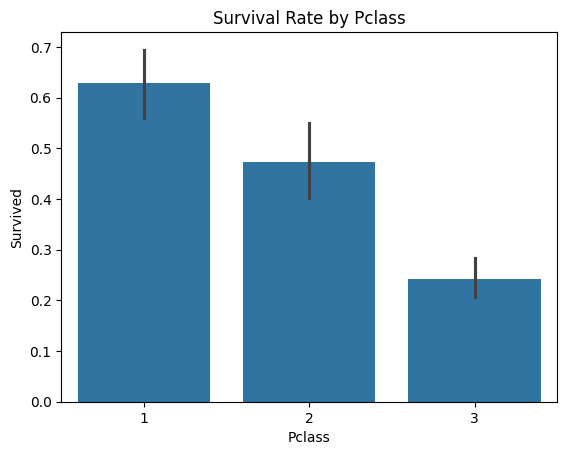

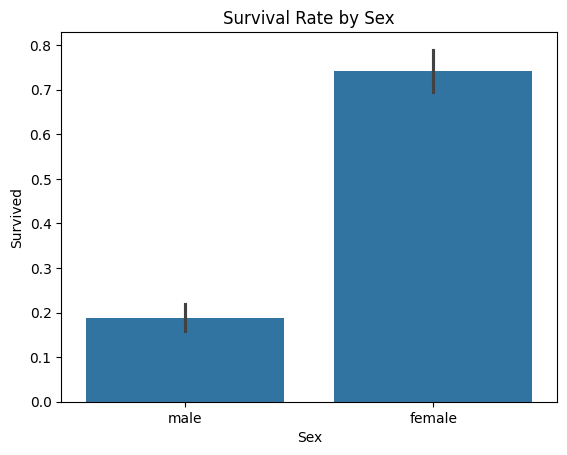

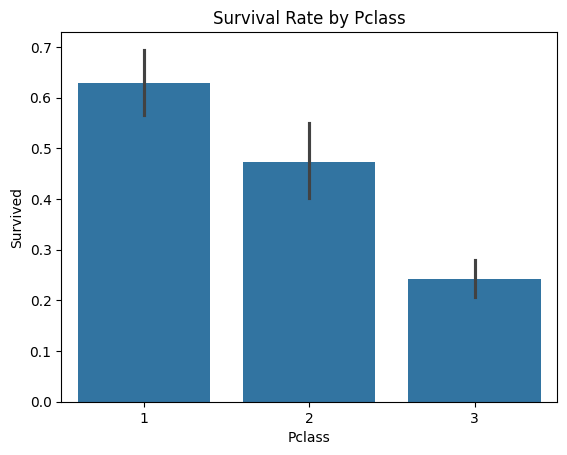

In [7]:
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.title("Survival Rate by Sex")
plt.show()

sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.title("Survival Rate by Pclass")
plt.show()

sns.barplot(x='Sex', y='Survived', data=train_df)
plt.title("Survival Rate by Sex")
plt.show()

sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.title("Survival Rate by Pclass")
plt.show()

In [8]:
'''Since from kaggle description we have this:
sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

then FamilySize = SibSp + Parch + 1 (1 for self)'''

# create two new features: FamilySize and IsAlone
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
train_df['IsAlone'] = 1  
train_df.loc[train_df['FamilySize'] > 1, 'IsAlone'] = 0
# im not sure IsAlone is useful or not (basically if network is strong it should learn it from FamilySize
# so i will check this later with stronger network)


In [ ]:
# get all titles from name
temp = train_df['Name'].str.extract(' ([A-Za-z]+)\\.', expand=False)
print(temp.groupby(temp).count())
#GOOGLE ==> The title "Mme." is the French abbreviation for Madame,
# a formal term of respect for a woman, equivalent to "Mrs." or "Madam" in English 👍
# GOOGLE ==> No, "Master" is not the same as "Mr."; "Master" was traditionally a title for a young boy,
# while "Mr." is an honorific for adult men.🤷‍♂️

Name
Capt          1
Col           2
Countess      1
Don           1
Dr            7
Jonkheer      1
Lady          1
Major         2
Master       40
Miss        182
Mlle          2
Mme           1
Mr          517
Mrs         125
Ms            1
Rev           6
Sir           1
Name: Name, dtype: int64


Index(['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major',
       'Mlle', 'Mme', 'Ms', 'Rev', 'Sir'],
      dtype='object', name='Name')

In [27]:
train_df['Title'] = train_df['Name'].str.extract(' ([A-Za-z]+)\\.', expand=False)
rares = train_df['Title'].groupby(train_df['Title']).count()[train_df['Title'].groupby(train_df['Title']).count() < 10].index
print(f'The rare titles are: {rares.to_list()}\n')
train_df['Title'] = train_df['Title'].replace(rares,'Rare')
train_df['Title'] = train_df['Title'].replace('Mlle','Miss')
train_df['Title'] = train_df['Title'].replace('Ms','Miss')
train_df['Title'] = train_df['Title'].replace('Mme','Mrs')
print(train_df.head(20).to_markdown())

The rare titles are: ['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Mlle', 'Mme', 'Ms', 'Rev', 'Sir']

|    |   PassengerId |   Survived |   Pclass | Name                                                    | Sex    |   Age |   SibSp |   Parch | Ticket           |    Fare | Cabin   | Embarked   |   FamilySize |   IsAlone | Title   |
|---:|--------------:|-----------:|---------:|:--------------------------------------------------------|:-------|------:|--------:|--------:|:-----------------|--------:|:--------|:-----------|-------------:|----------:|:--------|
|  0 |             1 |          0 |        3 | Braund, Mr. Owen Harris                                 | male   |    22 |       1 |       0 | A/5 21171        |  7.25   | nan     | S          |            2 |         0 | Mr      |
|  1 |             2 |          1 |        1 | Cumings, Mrs. John Bradley (Florence Briggs Thayer)     | female |    38 |       1 |       0 | PC 17599         | 71.2833 | C85     |

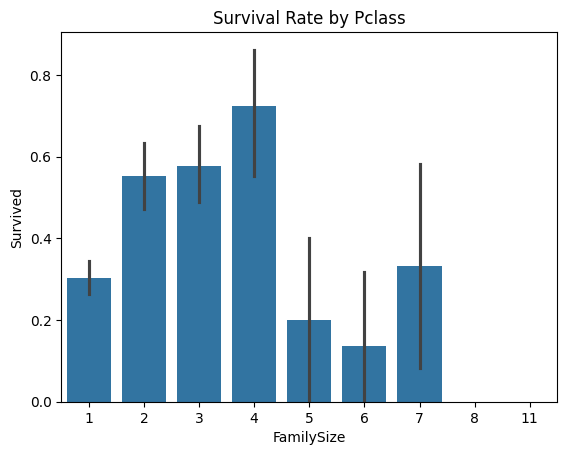

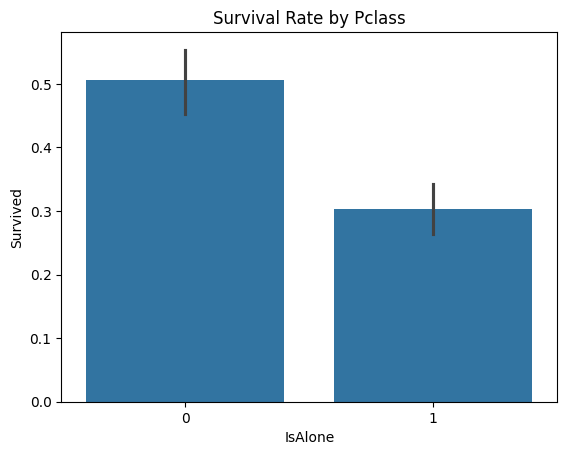

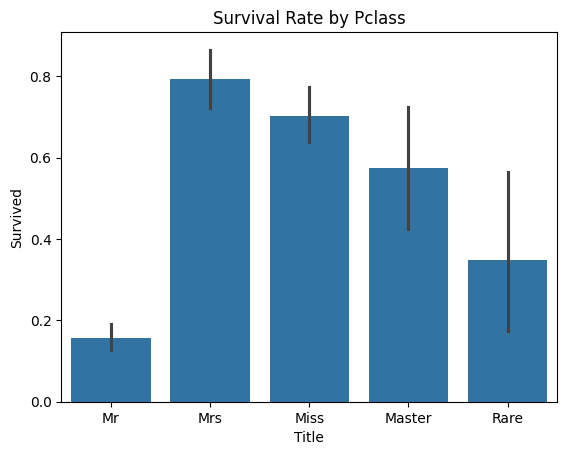

In [11]:
sns.barplot(x='FamilySize', y='Survived', data=train_df)
plt.title("Survival Rate by Pclass")
plt.show()

sns.barplot(x='IsAlone', y='Survived', data=train_df)
plt.title("Survival Rate by Pclass")
plt.show()

sns.barplot(x='Title', y='Survived', data=train_df)
plt.title("Survival Rate by Pclass")
plt.show()